## ETL PART 2 - DATA EXPLORATION

In [1]:
#Fire up Python
from mpl_toolkits.mplot3d import Axes3D
import sympy as sym
import pylab 
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import json
import os
%matplotlib inline

### Question to be answered
### "For a particular hole of a particular golf course, does the golf ball have a tendency to settle at a certain location or locations on the green, as a result of a putt?"
## Approach¶
### To answer this question, the investigation targeted two types of putts: putts into the hole and putts that have not made it into the hole. PGA ShotLink data for the 16th hole at the Waste Management Phoenix Open was analyzed. The ShotLink dataset includes GPS-like coordinates to help locate the location of the golf ball on the golf course.The 16th data investigation targeted all 16th hole green putts (for all rounds played) in year 2015, 2016, and 2017. The following discussion illustrates, in general, the steps taken to answer the question.
For example, here is the GPS-like location for the 16th hole at the Waste Management Phoenix Open: (x = 10625.821, y = 8838.066)

In [2]:
#Hole 16 coordinates:
holex = 10625.821
holey = 8838.066

print("Hole 16 coordinates: (" + str(holex) + ", " + str(holey) + ")")

Hole 16 coordinates: (10625.821, 8838.066)


#### Since it is good to start the investigation with quality data, let us load the Waste Management Phoenix Open dataset, which includes 16th hole data for year 2015, 2016, and 2017.

In [3]:
#Load dataset
df2 = pd.read_csv("Waste_Mgt_Phoenix_Only_2015_2016_2017.csv",low_memory=False)


## Holed Out Putts
#### So far, golfers sent 1,211 putts into the 16th hole (holed out putts) at the Waste Management Phoenix Open dataset, which includes 16th hole data for year 2015, 2016, and 2017. 

In [4]:
#Putts that went into the hole
df9 = (df2[(df2['tournament'] == 3) & (df2['holes'] == 16) & (df2['putt'] > 0) & (df2['dist'] > 0) & (df2['left'] == 0)])
df10 = df9.set_index(['tournament_name','year','p_full_name','rnds','holes','shots'])

# Let's make the 16th hole's x and y coordinates (0,0) 
df11 = df10.iloc[0:,17:23]
df11.iloc[0:,2:3] =(df11.iloc[0:,2] - holex)
df11.iloc[0:,4:5] = (df11.iloc[0:,4] - holey)

print(str(df10.putt.count()) +" putts made it into hole 16.")

1211 putts made it into hole 16.


#### The putts that made it into the hole exhibit two clusters. The top left corner of the following chart represent the putts that are farther from the hole ("far holed out putts". The bottom right corner of the chart represent the putts that are closer the hole ("near holed out putts"). 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


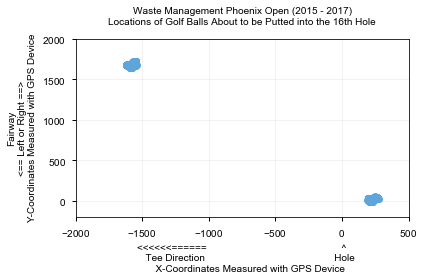

In [5]:
#Diplay putts

fig, ax = plt.subplots()

vx_all_holed_out_putts = np.array(df11.iloc[0:,2])
vy_all_holed_out_putts = np.array(df11.iloc[0:,4])
ax.scatter(vx_all_holed_out_putts, vy_all_holed_out_putts)

ax.set_xlim([-2000,500])
ax.set_ylim([-200,2000])
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Successful Putts", y=1.05,size=15)
ax.set_title("Waste Management Phoenix Open (2015 - 2017)" + "\n" + "Locations of Golf Balls About to be Putted into the 16th Hole", y=1.05,size=10)
ax.set_ylabel(r"Fairway" + "\n" + "<== Left or Right ==>" + "\n" +
                                                "Y-Coordinates Measured with GPS Device", labelpad=5, size=10)
ax.set_xlabel(r"<<<<<<======                                                 ^" + "\n" + 
                                                "      Tee Direction                                               Hole" + "\n" +
                                                "      X-Coordinates Measured with GPS Device" , labelpad=5, size=10)

plt.tight_layout()
plt.show()

#### Thus, there were 595 far holed out putts and 616 near holed out putts, for a total 1211 such putts.

In [6]:
#Display putt count per cluster
df12 = (df2[(df2['tournament'] == 3) & (df2['holes'] == 16) & (df2['putt'] > 0) & (df2['dist'] > 0) & (df2['left'] == 0)])
df13 = df12.set_index(['tournament_name','year','p_full_name','rnds','holes','shots'])

df14 = df13.iloc[0:,17:23]
df14.iloc[0:,2:3] = (df14.iloc[0:,2] - holex)
df14.iloc[0:,4:5] = (df14.iloc[0:,4] - holey)

df_far_holed_out_putts = df14[(df14['from_x'] <= 0)]
df_near_holed_out_putts = df14[(df14['from_x'] > 0)]
g_far_holed_out_putts_count = df_far_holed_out_putts.shape[0]
g_near_holed_out_putts_count = df_near_holed_out_putts.shape[0]
g_holed_out_putts_count_total = g_far_holed_out_putts_count + g_near_holed_out_putts_count

print(" far holed out putts: " + str(g_far_holed_out_putts_count) + ", "  + " near holed out putts: " + str(g_near_holed_out_putts_count) 
      + ", "  + "total putts into hole 16: " + str(g_holed_out_putts_count_total))

 far holed out putts: 595,  near holed out putts: 616, total putts into hole 16: 1211


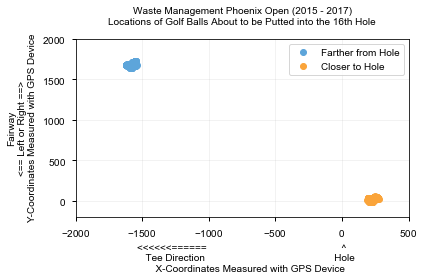

In [44]:
#Diplay putts

fig, ax = plt.subplots()

vx_far_holed_out_putts = np.array(df_far_holed_out_putts.iloc[0:,2])
vy_far_holed_out_putts = np.array(df_far_holed_out_putts.iloc[0:,4])
ax.scatter(vx_far_holed_out_putts, vy_far_holed_out_putts, label="Farther from Hole")

vx_near_holed_out_putts = np.array(df_near_holed_out_putts.iloc[0:,2])
vy_near_holed_out_putts = np.array(df_near_holed_out_putts.iloc[0:,4])
ax.scatter(vx_near_holed_out_putts, vy_near_holed_out_putts, label="Closer to Hole")

ax.set_xlim([-2000,500])
ax.set_ylim([-200,2000])
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Waste Management Phoenix Open (2015 - 2017)" + "\n" + "Locations of Golf Balls About to be Putted into the 16th Hole", y=1.05,size=10)

ax.set_ylabel(r"Fairway" + "\n" + "<== Left or Right ==>" + "\n" +
                                                "Y-Coordinates Measured with GPS Device", labelpad=5, size=10)
ax.set_xlabel(r"<<<<<<======                                                 ^" + "\n" + 
                                                "      Tee Direction                                               Hole" + "\n" +
                                                "      X-Coordinates Measured with GPS Device" , labelpad=5, size=10)

ax.legend() 

plt.tight_layout()
#plt.savefig('successful_putts.svg')
plt.show()


#### The following investigation indicates that holed out putts display patterns as to green location, while missed putts show no apparent location preference. To improve the clustering patterns, some datapoints were rejected for the far holed out and near holed out putts, as shown below.

### Far Holed Out Putts
#### Zooming into the far holed out putts revealed four internal clusters, as shown below.

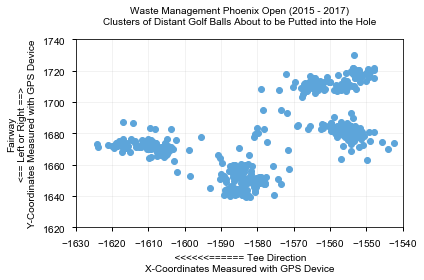

In [8]:
#Shows four subclusters.
fig, ax = plt.subplots()

vx_far_holed_out_putts = np.array(df_far_holed_out_putts.iloc[0:,2])
vy_far_holed_out_putts = np.array(df_far_holed_out_putts.iloc[0:,4])
ax.scatter(vx_far_holed_out_putts, vy_far_holed_out_putts)

ax.set_xlim([-1630,-1540])
ax.set_ylim([1620,1740])
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Waste Management Phoenix Open (2015 - 2017)" + "\n" + "Clusters of Distant Golf Balls About to be Putted into the Hole", y=1.05,size=10)
ax.set_ylabel(r"Fairway" + "\n" + "<== Left or Right ==>" + "\n" +
                                                "Y-Coordinates Measured with GPS Device", labelpad=5, size=10)
ax.set_xlabel(r"  <<<<<<====== Tee Direction " + "\n" +
               "X-Coordinates Measured with GPS Device" , labelpad=5, size=10)

plt.tight_layout()
plt.show()

#### In brief, an arbritary selection of far holed out putts yielded 99 far holed out putts in the first subcluster, 179 far holed out putts in the second subcluster 1, 132 far holed out putts in the third subcluster 1, 121 far holed out putts in the fourth subcluster 1, for a total of 531.

In [34]:
#Display putt count per cluster
df_far_holed_out_putts_1 = df14[((df14['from_x'].real > -1630) & (df14['from_x'].real <= -1600)) & ((df14['from_y'].real > 1660) & (df14['from_y'].real <= 1680))]
df_far_holed_out_putts_2 = df14[((df14['from_x'].real > -1592) & (df14['from_x'].real <= -1577)) & ((df14['from_y'].real > 1600) & (df14['from_y'].real <= 1662))]
df_far_holed_out_putts_3 = df14[((df14['from_x'].real > -1565) & (df14['from_x'].real <= -1550)) & ((df14['from_y'].real > 1675) & (df14['from_y'].real <= 1685))]
df_far_holed_out_putts_4 = df14[((df14['from_x'].real > -1572) & (df14['from_x'].real <= -1540)) & ((df14['from_y'].real > 1700) & (df14['from_y'].real <= 1725))]

g_far_holed_out_putts_1_count = df_far_holed_out_putts_1.shape[0]
g_far_holed_out_putts_2_count = df_far_holed_out_putts_2.shape[0]
g_far_holed_out_putts_3_count = df_far_holed_out_putts_3.shape[0]
g_far_holed_out_putts_4_count = df_far_holed_out_putts_4.shape[0]

g_far_holed_out_putts_sub_cluster_total_count = g_far_holed_out_putts_1_count + g_far_holed_out_putts_2_count + g_far_holed_out_putts_3_count + g_far_holed_out_putts_4_count

print(str(g_far_holed_out_putts_1_count) + " far holed out putts in subcluster 1, "  
          + str(g_far_holed_out_putts_2_count) + " far holed out putts in subcluster 2, "  
          + str(g_far_holed_out_putts_3_count) + " far holed out putts in subcluster 3, "
          + str(g_far_holed_out_putts_4_count) + " far holed out putts in subcluster 4, "
          + "for a total of " + str(g_far_holed_out_putts_sub_cluster_total_count) + ".")

99 far holed out putts in subcluster 1, 179 far holed out putts in subcluster 2, 132 far holed out putts in subcluster 3, 121 far holed out putts in subcluster 4, for a total of 531.


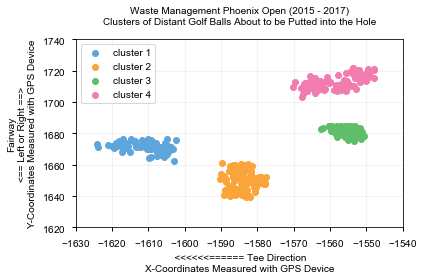

In [35]:
#########Far Putts####################################################################
fig, ax = plt.subplots()

vx_far_holed_out_putts_1 = np.array(df_far_holed_out_putts_1.iloc[0:,2])
vy_far_holed_out_putts_1 = np.array(df_far_holed_out_putts_1.iloc[0:,4])
ax.scatter(vx_far_holed_out_putts_1, vy_far_holed_out_putts_1, label="cluster 1")

vx_far_holed_out_putts_2 = np.array(df_far_holed_out_putts_2.iloc[0:,2])
vy_far_holed_out_putts_2 = np.array(df_far_holed_out_putts_2.iloc[0:,4])
ax.scatter(vx_far_holed_out_putts_2, vy_far_holed_out_putts_2, label="cluster 2")

vx_far_holed_out_putts_3 = np.array(df_far_holed_out_putts_3.iloc[0:,2])
vy_far_holed_out_putts_3 = np.array(df_far_holed_out_putts_3.iloc[0:,4])
ax.scatter(vx_far_holed_out_putts_3, vy_far_holed_out_putts_3, label="cluster 3")

vx_far_holed_out_putts_4 = np.array(df_far_holed_out_putts_4.iloc[0:,2])
vy_far_holed_out_putts_4 = np.array(df_far_holed_out_putts_4.iloc[0:,4])
ax.scatter(vx_far_holed_out_putts_4, vy_far_holed_out_putts_4, label="cluster 4")

ax.set_xlim([-1630,-1540])
ax.set_ylim([1620,1740])
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Waste Management Phoenix Open (2015 - 2017)" + "\n" + "Clusters of Distant Golf Balls About to be Putted into the Hole", y=1.05,size=10)
ax.set_ylabel(r"Fairway" + "\n" + "<== Left or Right ==>" + "\n" +
                                                "Y-Coordinates Measured with GPS Device", labelpad=5, size=10)
ax.set_xlabel(r"  <<<<<<====== Tee Direction " + "\n" +
               "X-Coordinates Measured with GPS Device" , labelpad=5, size=10)

ax.legend() 

plt.tight_layout()
#plt.savefig('far_holed_out_putts_clusters.svg')
plt.show()

 ### Near Holed Out Putts
 #### Further investigation of the near holed out putts revealed four internal clusters, as shown below.

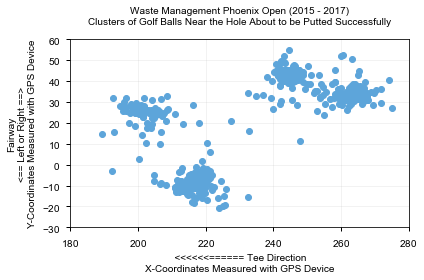

In [11]:
#Shows four subclusters
fig, ax = plt.subplots()

vx_near_holed_out_putts = np.array(df_near_holed_out_putts.iloc[0:,2])
vy_near_holed_out_putts = np.array(df_near_holed_out_putts.iloc[0:,4])
ax.scatter(vx_near_holed_out_putts, vy_near_holed_out_putts)

ax.set_xlim([180,280])
ax.set_ylim([-30,60])
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Waste Management Phoenix Open (2015 - 2017)" + "\n" + "Clusters of Golf Balls Near the Hole About to be Putted Successfully", y=1.05,size=10)
ax.set_ylabel(r"Fairway" + "\n" + "<== Left or Right ==>" + "\n" +
                                                "Y-Coordinates Measured with GPS Device", labelpad=5, size=10)
ax.set_xlabel(r"  <<<<<<====== Tee Direction " + "\n" +
               "X-Coordinates Measured with GPS Device" , labelpad=5, size=10)

plt.tight_layout()
plt.show()

#### Then, there were 90 near holed out putts in the first subcluster, 173 near holed out putts in the second subcluster, 111 near holed out putts in the third subcluster, 148 near holed out putts in the fourth subcluster, for a total of 522.

In [12]:
df_near_holed_out_putts_1 = df14[((df14['from_x'].real > 190) & (df14['from_x'].real <= 210)) & ((df14['from_y'].real > 22) & (df14['from_y'].real <= 30))]
df_near_holed_out_putts_2 = df14[((df14['from_x'].real > 207) & (df14['from_x'].real <= 222)) & ((df14['from_y'].real > -15) & (df14['from_y'].real <= 0))]
df_near_holed_out_putts_3 = df14[((df14['from_x'].real > 240) & (df14['from_x'].real <= 250)) & ((df14['from_y'].real > 37) & (df14['from_y'].real <= 50))]
df_near_holed_out_putts_4 = df14[((df14['from_x'].real > 257) & (df14['from_x'].real <= 270)) & ((df14['from_y'].real > 28) & (df14['from_y'].real <= 40))]

g_near_holed_out_putts_1_count = df_near_holed_out_putts_1.shape[0]
g_near_holed_out_putts_2_count = df_near_holed_out_putts_2.shape[0]
g_near_holed_out_putts_3_count = df_near_holed_out_putts_3.shape[0]
g_near_holed_out_putts_4_count = df_near_holed_out_putts_4.shape[0]

g_near_holed_out_putts_sub_cluster_total_count = g_near_holed_out_putts_1_count + g_near_holed_out_putts_2_count + g_near_holed_out_putts_3_count + g_near_holed_out_putts_4_count

print(str(g_near_holed_out_putts_1_count) + " near holed out putts in subcluster 1, "  
          + str(g_near_holed_out_putts_2_count) + " near holed out putts in subcluster 2, "  
          + str(g_near_holed_out_putts_3_count) + " near holed out putts in subcluster 3, "
          + str(g_near_holed_out_putts_4_count) + " near holed out putts in subcluster 4, "
          + "for a total of " + str(g_near_holed_out_putts_sub_cluster_total_count) + ".")

90 near holed out putts in subcluster 1, 173 near holed out putts in subcluster 2, 111 near holed out putts in subcluster 3, 148 near holed out putts in subcluster 4, for a total of 522.


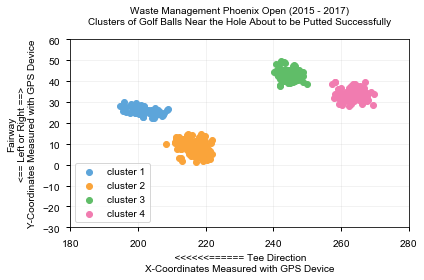

In [38]:
                       
#########Near Putts####################################################################
fig, ax = plt.subplots()

vx_near_holed_out_putts_1 = np.array(df_near_holed_out_putts_1.iloc[0:,2])
vy_near_holed_out_putts_1 = np.array(df_near_holed_out_putts_1.iloc[0:,4])
ax.scatter(vx_near_holed_out_putts_1, vy_near_holed_out_putts_1, label="cluster 1")

vx_near_holed_out_putts_2 = np.array(df_near_holed_out_putts_2.iloc[0:,2])
vy_near_holed_out_putts_2 = np.array(df_near_holed_out_putts_2.iloc[0:,4])
ax.scatter(vx_near_holed_out_putts_2, vy_near_holed_out_putts_2, label="cluster 2")

vx_near_holed_out_putts_3 = np.array(df_near_holed_out_putts_3.iloc[0:,2])
vy_near_holed_out_putts_3 = np.array(df_near_holed_out_putts_3.iloc[0:,4])
ax.scatter(vx_near_holed_out_putts_3, vy_near_holed_out_putts_3, label="cluster 3")

vx_near_holed_out_putts_4 = np.array(df_near_holed_out_putts_4.iloc[0:,2])
vy_near_holed_out_putts_4 = np.array(df_near_holed_out_putts_4.iloc[0:,4])
ax.scatter(vx_near_holed_out_putts_4, vy_near_holed_out_putts_4, label="cluster 4")

ax.set_xlim([180,280])
ax.set_ylim([-30,60])
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Waste Management Phoenix Open (2015 - 2017)" + "\n" + "Clusters of Golf Balls Near the Hole About to be Putted Successfully", y=1.05,size=10)
ax.set_ylabel(r"Fairway" + "\n" + "<== Left or Right ==>" + "\n" +
                                                "Y-Coordinates Measured with GPS Device", labelpad=5, size=10)
ax.set_xlabel(r"  <<<<<<====== Tee Direction " + "\n" +
               "X-Coordinates Measured with GPS Device" , labelpad=5, size=10)

ax.legend() 

plt.tight_layout()
#plt.savefig('near_holed_out_putts_clusters.svg')
plt.show()

## Putts Missed
#### To continue, golfers missed 797 putts on the 16th hole (putts missed) at the Waste Management Phoenix Open dataset, which includes 16th hole data for year 2015, 2016, and 2017. 

In [14]:
df19 = (df2[(df2['tournament'] == 3) & (df2['holes'] == 16) & (df2['putt'] > 0) & (df2['dist'] > 0) & (df2['left'] > 0)])
df20 = df19.set_index(['tournament_name','year','p_full_name','rnds','holes','shots'])

df21 = df20.iloc[0:,17:23]
df21.iloc[0:,2:3] =(df21.iloc[0:,2] - holex)
df21.iloc[0:,4:5] = (df21.iloc[0:,4] - holey)

#230 rows × 6 columns
df21.shape[0]

797

#### The missed putts displays two clusters. The top left corner of the following chart represent the missed putts that are farther from the hole ("far missed putts". The bottom right corner of the chart represent the missed putts that are closer the hole ("near missed putts"). 

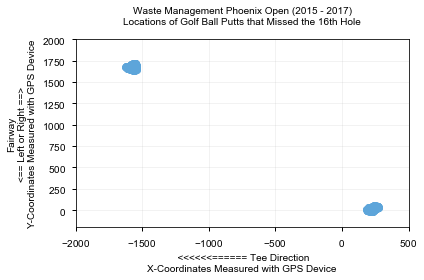

In [15]:
fig, ax = plt.subplots()

vx_all_missed_putts = np.array(df21.iloc[0:,2])
vy_all_missed_putts = np.array(df21.iloc[0:,4])
ax.scatter(vx_all_missed_putts, vy_all_missed_putts)

ax.set_xlim([-2000,500])
ax.set_ylim([-200,2000])
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Waste Management Phoenix Open (2015 - 2017)" + "\n" + "Locations of Golf Ball Putts that Missed the 16th Hole", y=1.05,size=10)
ax.set_ylabel(r"Fairway" + "\n" + "<== Left or Right ==>" + "\n" +
                                                "Y-Coordinates Measured with GPS Device", labelpad=5, size=10)
ax.set_xlabel(r"  <<<<<<====== Tee Direction " + "\n" +
               "X-Coordinates Measured with GPS Device" , labelpad=5, size=10)

plt.tight_layout()
plt.show()

#### As such, there were 402 far missed putts and 395 near missed putts, for a total 797 such putts.

In [40]:
df22 = (df2[(df2['tournament'] == 3) & (df2['holes'] == 16) & (df2['putt'] > 0) & (df2['dist'] > 0) & (df2['left'] > 0)])
df23 = df22.set_index(['tournament_name','year','p_full_name','rnds','holes','shots'])

df24 = df23.iloc[0:,17:23]
df24.iloc[0:,2:3] = (df24.iloc[0:,2] - holex)
df24.iloc[0:,4:5] = (df24.iloc[0:,4] - holey)

df_far_missed_putts = df24[(df24['from_x'] <= 0)]
df_near_missed_putts = df24[(df24['from_x'] > 0)]
g_far_missed_putts_count = df_far_missed_putts.shape[0]
g_near_missed_putts_count = df_near_missed_putts.shape[0]
g_missed_putts_total_count = g_far_missed_putts_count + g_near_missed_putts_count

print(" far missed putts: " + str(g_far_missed_putts_count) + ", "  + " near missed putts: " + str(g_near_missed_putts_count) 
      + ", "  + "total missed putts on hole 16: " + str(g_missed_putts_total_count))

 far missed putts: 402,  near missed putts: 395, total missed putts on hole 16: 797


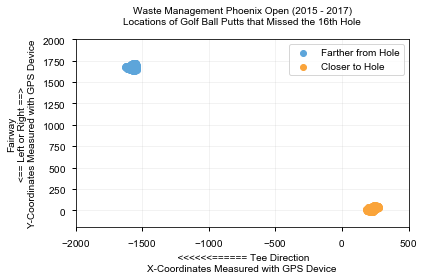

In [41]:
#Diplay missed putts

fig, ax = plt.subplots()

vx_far_missed_putts = np.array(df_far_missed_putts.iloc[0:,2])
vy_far_missed_putts = np.array(df_far_missed_putts.iloc[0:,4])
ax.scatter(vx_far_missed_putts, vy_far_missed_putts, label="Farther from Hole")

vx_near_missed_putts = np.array(df_near_missed_putts.iloc[0:,2])
vy_near_missed_putts = np.array(df_near_missed_putts.iloc[0:,4])
ax.scatter(vx_near_missed_putts, vy_near_missed_putts, label="Closer to Hole")

ax.set_xlim([-2000,500])
ax.set_ylim([-200,2000])
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Waste Management Phoenix Open (2015 - 2017)" + "\n" + "Locations of Golf Ball Putts that Missed the 16th Hole", y=1.05,size=10)
ax.set_ylabel(r"Fairway" + "\n" + "<== Left or Right ==>" + "\n" +
                                                "Y-Coordinates Measured with GPS Device", labelpad=5, size=10)
ax.set_xlabel(r"  <<<<<<====== Tee Direction " + "\n" +
               "X-Coordinates Measured with GPS Device" , labelpad=5, size=10)

ax.legend() 

plt.tight_layout()
#plt.savefig('missed_putts_clusters.svg')
plt.show()

### Far Missed Putts
#### Zooming into the far missed putts revealed no clear patterns, as shown below.

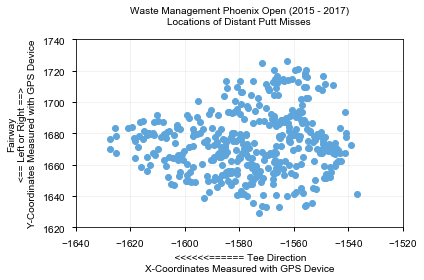

In [42]:
fig, ax = plt.subplots()

vx_far_missed_putts = np.array(df_far_missed_putts.iloc[0:,2])
vy_far_missed_putts = np.array(df_far_missed_putts.iloc[0:,4])
ax.scatter(vx_far_missed_putts, vy_far_missed_putts)


ax.set_xlim([-1640,-1520])
ax.set_ylim([1620,1740])
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Waste Management Phoenix Open (2015 - 2017)" + "\n" + "Locations of Distant Putt Misses", y=1.05,size=10)
ax.set_ylabel(r"Fairway" + "\n" + "<== Left or Right ==>" + "\n" +
                                                "Y-Coordinates Measured with GPS Device", labelpad=5, size=10)
ax.set_xlabel(r"  <<<<<<====== Tee Direction " + "\n" +
               "X-Coordinates Measured with GPS Device" , labelpad=5, size=10)

plt.tight_layout()
#plt.savefig('far_missed_putts.svg')
plt.show()

 ### Near Missed Putts
 #### Further investigation of the near missed putts revealed no clear patterns as well, as shown below.

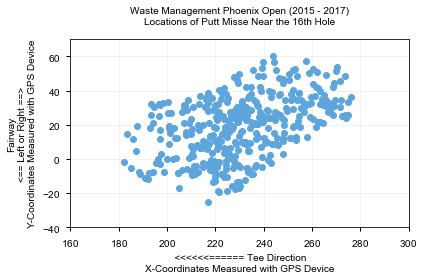

In [43]:
fig, ax = plt.subplots()

vx_near_missed_putts = np.array(df_near_missed_putts.iloc[0:,2])
vy_near_missed_putts = np.array(df_near_missed_putts.iloc[0:,4])
ax.scatter(vx_near_missed_putts, vy_near_missed_putts)

ax.set_xlim([160,300])
ax.set_ylim([-40,70])
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Waste Management Phoenix Open (2015 - 2017)" + "\n" + "Locations of Putt Misse Near the 16th Hole", y=1.05,size=10)
ax.set_ylabel(r"Fairway" + "\n" + "<== Left or Right ==>" + "\n" +
                                                "Y-Coordinates Measured with GPS Device", labelpad=5, size=10)
ax.set_xlabel(r"  <<<<<<====== Tee Direction " + "\n" +
               "X-Coordinates Measured with GPS Device" , labelpad=5, size=10)

plt.tight_layout()
#plt.savefig('near_missed_putts.svg')
plt.show()

# Insights

#### A polar viewpoint of the data presents a bird's eye view of the action onthe green, when the distance from the hole and angle of approach to the 16th hole are investigated.  

In [46]:

df_far_holed_out_putts_1.iloc[0:,2:3] = (df_far_holed_out_putts_1.iloc[0:,2]**2)
df_far_holed_out_putts_1.iloc[0:,4:5] = (df_far_holed_out_putts_1.iloc[0:,4]**2)
df_far_holed_out_putts_1.iloc[0:,5] = (df_far_holed_out_putts_1.iloc[0:,2] + df_far_holed_out_putts_1.iloc[0:,4])**.5
df_far_holed_out_putts_1.iloc[0:,2:3] = (df_far_holed_out_putts_1.iloc[0:,2]**.5)
df_far_holed_out_putts_1.iloc[0:,4:5] = (df_far_holed_out_putts_1.iloc[0:,4]**.5)
df_far_holed_out_putts_1.iloc[0:,5] = (df_far_holed_out_putts_1.iloc[0:,2]/df_far_holed_out_putts_1.iloc[0:,5])
df_far_holed_out_putts_1.iloc[0:,5] = np.arccos(df_far_holed_out_putts_1.iloc[0:,5])

df_far_holed_out_putts_2.iloc[0:,2:3] = (df_far_holed_out_putts_2.iloc[0:,2]**2)
df_far_holed_out_putts_2.iloc[0:,4:5] = (df_far_holed_out_putts_2.iloc[0:,4]**2)
df_far_holed_out_putts_2.iloc[0:,5] = (df_far_holed_out_putts_2.iloc[0:,2] + df_far_holed_out_putts_2.iloc[0:,4])**.5
df_far_holed_out_putts_2.iloc[0:,2:3] = (df_far_holed_out_putts_2.iloc[0:,2]**.5)
df_far_holed_out_putts_2.iloc[0:,4:5] = (df_far_holed_out_putts_2.iloc[0:,4]**.5)
df_far_holed_out_putts_2.iloc[0:,5] = (df_far_holed_out_putts_2.iloc[0:,2]/df_far_holed_out_putts_2.iloc[0:,5])
df_far_holed_out_putts_2.iloc[0:,5] = np.arccos(df_far_holed_out_putts_2.iloc[0:,5])

df_far_holed_out_putts_3.iloc[0:,2:3] = (df_far_holed_out_putts_3.iloc[0:,2]**2)
df_far_holed_out_putts_3.iloc[0:,4:5] = (df_far_holed_out_putts_3.iloc[0:,4]**2)
df_far_holed_out_putts_3.iloc[0:,5] = (df_far_holed_out_putts_3.iloc[0:,2] + df_far_holed_out_putts_3.iloc[0:,4])**.5
df_far_holed_out_putts_3.iloc[0:,2:3] = (df_far_holed_out_putts_3.iloc[0:,2]**.5)
df_far_holed_out_putts_3.iloc[0:,4:5] = (df_far_holed_out_putts_3.iloc[0:,4]**.5)
df_far_holed_out_putts_3.iloc[0:,5] = (df_far_holed_out_putts_3.iloc[0:,2]/df_far_holed_out_putts_3.iloc[0:,5])
df_far_holed_out_putts_3.iloc[0:,5] = np.arccos(df_far_holed_out_putts_3.iloc[0:,5])

df_far_holed_out_putts_4.iloc[0:,2:3] = (df_far_holed_out_putts_4.iloc[0:,2]**2)
df_far_holed_out_putts_4.iloc[0:,4:5] = (df_far_holed_out_putts_4.iloc[0:,4]**2)
df_far_holed_out_putts_4.iloc[0:,5] = (df_far_holed_out_putts_4.iloc[0:,2] + df_far_holed_out_putts_4.iloc[0:,4])**.5
df_far_holed_out_putts_4.iloc[0:,2:3] = (df_far_holed_out_putts_4.iloc[0:,2]**.5)
df_far_holed_out_putts_4.iloc[0:,4:5] = (df_far_holed_out_putts_4.iloc[0:,4]**.5)
df_far_holed_out_putts_4.iloc[0:,5] = (df_far_holed_out_putts_4.iloc[0:,2]/df_far_holed_out_putts_4.iloc[0:,5])
df_far_holed_out_putts_4.iloc[0:,5] = np.arccos(df_far_holed_out_putts_4.iloc[0:,5])

In [47]:

df_near_holed_out_putts_1.iloc[0:,2:3] = (df_near_holed_out_putts_1.iloc[0:,2]**2)
df_near_holed_out_putts_1.iloc[0:,4:5] = (df_near_holed_out_putts_1.iloc[0:,4]**2)
df_near_holed_out_putts_1.iloc[0:,5] = (df_near_holed_out_putts_1.iloc[0:,2] + df_near_holed_out_putts_1.iloc[0:,4])**.5
df_near_holed_out_putts_1.iloc[0:,2:3] = (df_near_holed_out_putts_1.iloc[0:,2]**.5)
df_near_holed_out_putts_1.iloc[0:,4:5] = (df_near_holed_out_putts_1.iloc[0:,4]**.5)
df_near_holed_out_putts_1.iloc[0:,5] = (df_near_holed_out_putts_1.iloc[0:,2]/df_near_holed_out_putts_1.iloc[0:,5])
df_near_holed_out_putts_1.iloc[0:,5] = np.arccos(df_near_holed_out_putts_1.iloc[0:,5])

df_near_holed_out_putts_2.iloc[0:,2:3] = (df_near_holed_out_putts_2.iloc[0:,2]**2)
df_near_holed_out_putts_2.iloc[0:,4:5] = (df_near_holed_out_putts_2.iloc[0:,4]**2)
df_near_holed_out_putts_2.iloc[0:,5] = (df_near_holed_out_putts_2.iloc[0:,2] + df_near_holed_out_putts_2.iloc[0:,4])**.5
df_near_holed_out_putts_2.iloc[0:,2:3] = (df_near_holed_out_putts_2.iloc[0:,2]**.5)
df_near_holed_out_putts_2.iloc[0:,4:5] = (df_near_holed_out_putts_2.iloc[0:,4]**.5)
df_near_holed_out_putts_2.iloc[0:,5] = (df_near_holed_out_putts_2.iloc[0:,2]/df_near_holed_out_putts_2.iloc[0:,5])
df_near_holed_out_putts_2.iloc[0:,5] = np.arccos(df_near_holed_out_putts_2.iloc[0:,5])

df_near_holed_out_putts_3.iloc[0:,2:3] = (df_near_holed_out_putts_3.iloc[0:,2]**2)
df_near_holed_out_putts_3.iloc[0:,4:5] = (df_near_holed_out_putts_3.iloc[0:,4]**2)
df_near_holed_out_putts_3.iloc[0:,5] = (df_near_holed_out_putts_3.iloc[0:,2] + df_near_holed_out_putts_3.iloc[0:,4])**.5
df_near_holed_out_putts_3.iloc[0:,2:3] = (df_near_holed_out_putts_3.iloc[0:,2]**.5)
df_near_holed_out_putts_3.iloc[0:,4:5] = (df_near_holed_out_putts_3.iloc[0:,4]**.5)
df_near_holed_out_putts_3.iloc[0:,5] = (df_near_holed_out_putts_3.iloc[0:,2]/df_near_holed_out_putts_3.iloc[0:,5])
df_near_holed_out_putts_3.iloc[0:,5] = np.arccos(df_near_holed_out_putts_3.iloc[0:,5])

df_near_holed_out_putts_4.iloc[0:,2:3] = (df_near_holed_out_putts_4.iloc[0:,2]**2)
df_near_holed_out_putts_4.iloc[0:,4:5] = (df_near_holed_out_putts_4.iloc[0:,4]**2)
df_near_holed_out_putts_4.iloc[0:,5] = (df_near_holed_out_putts_4.iloc[0:,2] + df_near_holed_out_putts_4.iloc[0:,4])**.5
df_near_holed_out_putts_4.iloc[0:,2:3] = (df_near_holed_out_putts_4.iloc[0:,2]**.5)
df_near_holed_out_putts_4.iloc[0:,4:5] = (df_near_holed_out_putts_4.iloc[0:,4]**.5)
df_near_holed_out_putts_4.iloc[0:,5] = (df_near_holed_out_putts_4.iloc[0:,2]/df_near_holed_out_putts_4.iloc[0:,5])
df_near_holed_out_putts_4.iloc[0:,5] = np.arccos(df_near_holed_out_putts_4.iloc[0:,5])

In [48]:

df_far_missed_putts.iloc[0:,2:3] =(df_far_missed_putts.iloc[0:,2]**2)
df_far_missed_putts.iloc[0:,4:5] =(df_far_missed_putts.iloc[0:,4]**2)
df_far_missed_putts.iloc[0:,5] =(df_far_missed_putts.iloc[0:,2] + df_far_missed_putts.iloc[0:,4])**.5
df_far_missed_putts.iloc[0:,2:3] =(df_far_missed_putts.iloc[0:,2]**.5)
df_far_missed_putts.iloc[0:,4:5] =(df_far_missed_putts.iloc[0:,4]**.5)
df_far_missed_putts.iloc[0:,5] = (df_far_missed_putts.iloc[0:,2]/df_far_missed_putts.iloc[0:,5])
df_far_missed_putts.iloc[0:,5] = np.arccos(df_far_missed_putts.iloc[0:,5])

df_near_missed_putts.iloc[0:,2:3] =(df_near_missed_putts.iloc[0:,2]**2)
df_near_missed_putts.iloc[0:,4:5] =(df_near_missed_putts.iloc[0:,4]**2)
df_near_missed_putts.iloc[0:,5] =(df_near_missed_putts.iloc[0:,2] + df_near_missed_putts.iloc[0:,4])**.5
df_near_missed_putts.iloc[0:,2:3] =(df_near_missed_putts.iloc[0:,2]**.5)
df_near_missed_putts.iloc[0:,4:5] =(df_near_missed_putts.iloc[0:,4]**.5)
df_near_missed_putts.iloc[0:,5] = (df_near_missed_putts.iloc[0:,2]/df_near_missed_putts.iloc[0:,5])
df_near_missed_putts.iloc[0:,5] = np.arccos(df_near_missed_putts.iloc[0:,5])


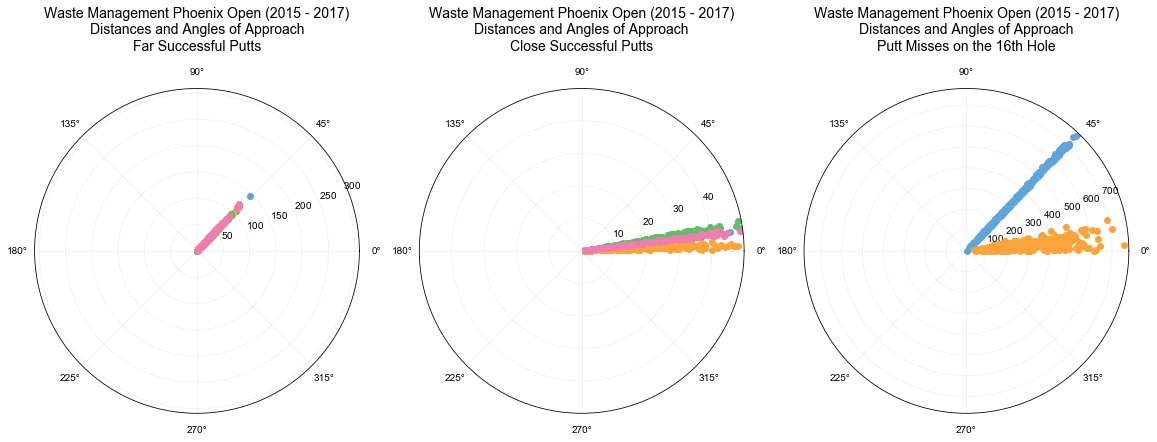

In [54]:
fig = plt.figure(figsize=(80, 80))

fig.add_axes(projection='polar', facecolor='#d5de9c')

ax_far_holed_out_putts = plt.subplot2grid((15,15), (0,0), polar=True) 
ax_near_holed_out_putts = plt.subplot2grid((15,15), (0,1), polar=True)
ax_missed_putts = plt.subplot2grid((15,15), (0,2), polar=True)

ax_far_holed_out_putts.scatter(df_far_holed_out_putts_1.iloc[0:,5], df_far_holed_out_putts_1.iloc[0:,0])
ax_far_holed_out_putts.scatter(df_far_holed_out_putts_2.iloc[0:,5], df_far_holed_out_putts_2.iloc[0:,0])
ax_far_holed_out_putts.scatter(df_far_holed_out_putts_3.iloc[0:,5], df_far_holed_out_putts_3.iloc[0:,0])
ax_far_holed_out_putts.scatter(df_far_holed_out_putts_4.iloc[0:,5], df_far_holed_out_putts_4.iloc[0:,0])

ax_near_holed_out_putts.scatter(df_near_holed_out_putts_1.iloc[0:,5], df_near_holed_out_putts_1.iloc[0:,0])
ax_near_holed_out_putts.scatter(df_near_holed_out_putts_2.iloc[0:,5], df_near_holed_out_putts_2.iloc[0:,0])
ax_near_holed_out_putts.scatter(df_near_holed_out_putts_3.iloc[0:,5], df_near_holed_out_putts_3.iloc[0:,0])
ax_near_holed_out_putts.scatter(df_near_holed_out_putts_4.iloc[0:,5], df_near_holed_out_putts_4.iloc[0:,0])

ax_missed_putts.scatter(df_far_missed_putts.iloc[0:,5], df_far_missed_putts.iloc[0:,0])
ax_missed_putts.scatter(df_near_missed_putts.iloc[0:,5], df_near_missed_putts.iloc[0:,0])

ax_far_holed_out_putts.set_title("Waste Management Phoenix Open (2015 - 2017)" + "\n" + "Distances and Angles of Approach" + "\n" + "Far Successful Putts", y=1.1,size=14)
ax_near_holed_out_putts.set_title("Waste Management Phoenix Open (2015 - 2017)" + "\n" + "Distances and Angles of Approach" + "\n" + "Close Successful Putts", y=1.1,size=14)
ax_missed_putts.set_title("Waste Management Phoenix Open (2015 - 2017)" + "\n" + "Distances and Angles of Approach" + "\n" + "Putt Misses on the 16th Hole", y=1.1,size=14)

plt.tight_layout()
#plt.savefig('all_putts_polar.svg')
plt.show()

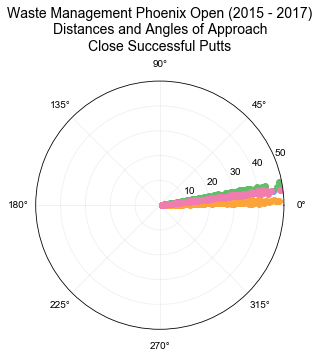

In [58]:
fig = plt.figure(figsize=(60,60))

fig.add_axes(projection='polar', facecolor='#d5de9c')


ax_near_holed_out_putts = plt.subplot2grid((15,15), (0,1), polar=True)

ax_near_holed_out_putts.scatter(df_near_holed_out_putts_1.iloc[0:,5], df_near_holed_out_putts_1.iloc[0:,0])
ax_near_holed_out_putts.scatter(df_near_holed_out_putts_2.iloc[0:,5], df_near_holed_out_putts_2.iloc[0:,0])
ax_near_holed_out_putts.scatter(df_near_holed_out_putts_3.iloc[0:,5], df_near_holed_out_putts_3.iloc[0:,0])
ax_near_holed_out_putts.scatter(df_near_holed_out_putts_4.iloc[0:,5], df_near_holed_out_putts_4.iloc[0:,0])

ax_near_holed_out_putts.set_title("Waste Management Phoenix Open (2015 - 2017)" + "\n" + "Distances and Angles of Approach" + "\n" + "Close Successful Putts", y=1.1,size=14)

plt.tight_layout()
#plt.savefig('near_success_putts_polar.svg')
plt.show()

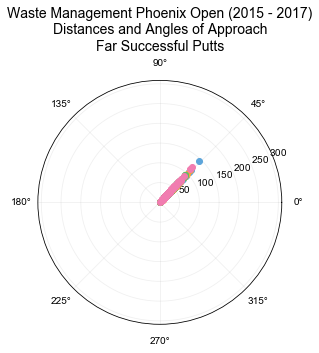

In [60]:
fig = plt.figure(figsize=(60,60))

fig.add_axes(projection='polar', facecolor='#d5de9c')

ax_far_holed_out_putts = plt.subplot2grid((15,15), (0,0), polar=True) 

ax_far_holed_out_putts.scatter(df_far_holed_out_putts_1.iloc[0:,5], df_far_holed_out_putts_1.iloc[0:,0])
ax_far_holed_out_putts.scatter(df_far_holed_out_putts_2.iloc[0:,5], df_far_holed_out_putts_2.iloc[0:,0])
ax_far_holed_out_putts.scatter(df_far_holed_out_putts_3.iloc[0:,5], df_far_holed_out_putts_3.iloc[0:,0])
ax_far_holed_out_putts.scatter(df_far_holed_out_putts_4.iloc[0:,5], df_far_holed_out_putts_4.iloc[0:,0])

ax_far_holed_out_putts.set_title("Waste Management Phoenix Open (2015 - 2017)" + "\n" + "Distances and Angles of Approach" + "\n" + "Far Successful Putts", y=1.1,size=14)

plt.tight_layout()
#plt.savefig('far_success_putts_polar.svg')
plt.show()

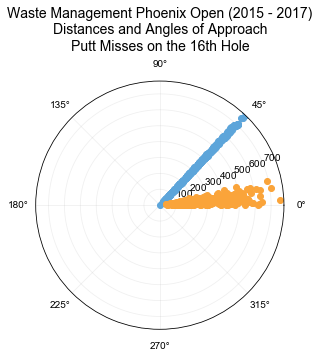

In [62]:
fig = plt.figure(figsize=(60,60))

fig.add_axes(projection='polar', facecolor='#d5de9c')


ax_missed_putts = plt.subplot2grid((15,15), (0,2), polar=True)

ax_missed_putts.scatter(df_far_missed_putts.iloc[0:,5], df_far_missed_putts.iloc[0:,0])
ax_missed_putts.scatter(df_near_missed_putts.iloc[0:,5], df_near_missed_putts.iloc[0:,0])

ax_missed_putts.set_title("Waste Management Phoenix Open (2015 - 2017)" + "\n" + "Distances and Angles of Approach" + "\n" + "Putt Misses on the 16th Hole", y=1.1,size=14)

plt.tight_layout()
#plt.savefig('all_missed_putts_polar.svg')
plt.show()

# End